In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.colors import ListedColormap
sb.set() # set the default Seaborn style for graphics
# Import essential models and functions from sklearn
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import plot_tree
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler
from sklearn.datasets import make_classification

#Models
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Tree visualisation
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import graphviz
import pydotplus

data = pd.read_csv('dataset.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [3]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
#check for null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Check for null values within the dataset, if there is, we need to fix it. <br>
For this dataset there are no null values. 

In [5]:
#there seems to be a typo in the spelling of nationality, change to correct spelling
data.rename(columns = {'Nacionality':'Nationality'}, inplace = True) 

In [6]:
#check the number of unique values in target column
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
#convert the values to numbers instead of strings 
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

As we are looking to predict whether a student is dropped out or not, there should only be 2 classes, in the case of this dataset, we changed enrolled to graduated.

In [8]:
#check if successfully converted
data['Target'].unique()

array([0, 1], dtype=int64)

In [9]:
#check if successfully converted
data['Target'].value_counts()

Target
1    3003
0    1421
Name: count, dtype: int64

In [10]:
#Pearson's linear correlation
data.corr()['Target'].sort_values()

Age at enrollment                                -0.254215
Debtor                                           -0.229407
Gender                                           -0.203983
Application mode                                 -0.188908
Marital status                                   -0.093712
Previous qualification                           -0.091590
Curricular units 2nd sem (without evaluations)   -0.079901
Mother's qualification                           -0.059499
Curricular units 1st sem (without evaluations)   -0.054230
Inflation rate                                   -0.027826
Father's qualification                           -0.016267
Unemployment rate                                -0.012980
Educational special needs                        -0.002806
Course                                            0.000083
Nationality                                       0.001571
International                                     0.010360
Curricular units 1st sem (credited)               0.0293

We do a correlation between the various variables against the response. Values close to 0 have little correlation with the response while values close to -1 or 1 indicates strong correlation.  <br>
From this, we can see that the top 5 variables that have a correlation to the response variable are: <br>
Tuition fees up to date                           0.429149 <br>
Curricular units 1st sem (approved)               0.479112 <br>
Curricular units 1st sem (grade)                  0.480669 <br>
Curricular units 2nd sem (approved)               0.569500 <br>
Curricular units 2nd sem (grade)                  0.571792 <br>

In [11]:
# Remove vairables which have low correlation to the response variable
data = data.drop(columns=['Course', 'International', 'Educational special needs', 'Unemployment rate',
                          'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 'GDP',
                         'Father\'s qualification', 'Inflation rate'], axis=1)
data.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,8,5,1,1,1,13,6,10,1,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,1,6,1,1,1,1,1,4,4,1,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,1,1,5,1,1,1,22,10,10,1,...,0,0,0.000000,0,6,0,0,0.000000,0,0
3,1,8,2,1,1,1,23,6,4,1,...,8,6,13.428571,0,6,10,5,12.400000,0,1
4,2,12,1,0,1,1,22,10,10,0,...,9,5,12.333333,0,6,6,6,13.000000,0,1


What Is Feature Engineering? <br>
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [12]:
# interaction between the grades from the first and second semesters
data['Interaction between 1st and 2nd sem grades'] = data['Curricular units 1st sem (grade)'] * data['Curricular units 2nd sem (grade)']
data['Average Grade'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2

# interaction between Curricular units from first and second semester approved   
data['Interaction between 1st and 2nd sem CU'] = data['Curricular units 1st sem (approved)'] * data['Curricular units 2nd sem (approved)']
data['Total CU Approved'] = data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)']

In [13]:
# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                   'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']
data.drop(columns_to_drop, axis=1, inplace=True)

Multicollinearity occurs when two or more features are highly correlated with each other, which can lead to instability in model coefficients and make it difficult to interpret the individual contributions of each feature.

In [14]:
#Pearson's linear correlation
data.corr()['Target'].sort_values()

Age at enrollment                                -0.254215
Debtor                                           -0.229407
Gender                                           -0.203983
Application mode                                 -0.188908
Marital status                                   -0.093712
Previous qualification                           -0.091590
Curricular units 2nd sem (without evaluations)   -0.079901
Mother's qualification                           -0.059499
Curricular units 1st sem (without evaluations)   -0.054230
Nationality                                       0.001571
Mother's occupation                               0.069102
Application order                                 0.070485
Father's occupation                               0.079753
Daytime/evening attendance                        0.080499
Curricular units 1st sem (evaluations)            0.090125
Displaced                                         0.107232
Curricular units 1st sem (enrolled)               0.1246

<Axes: >

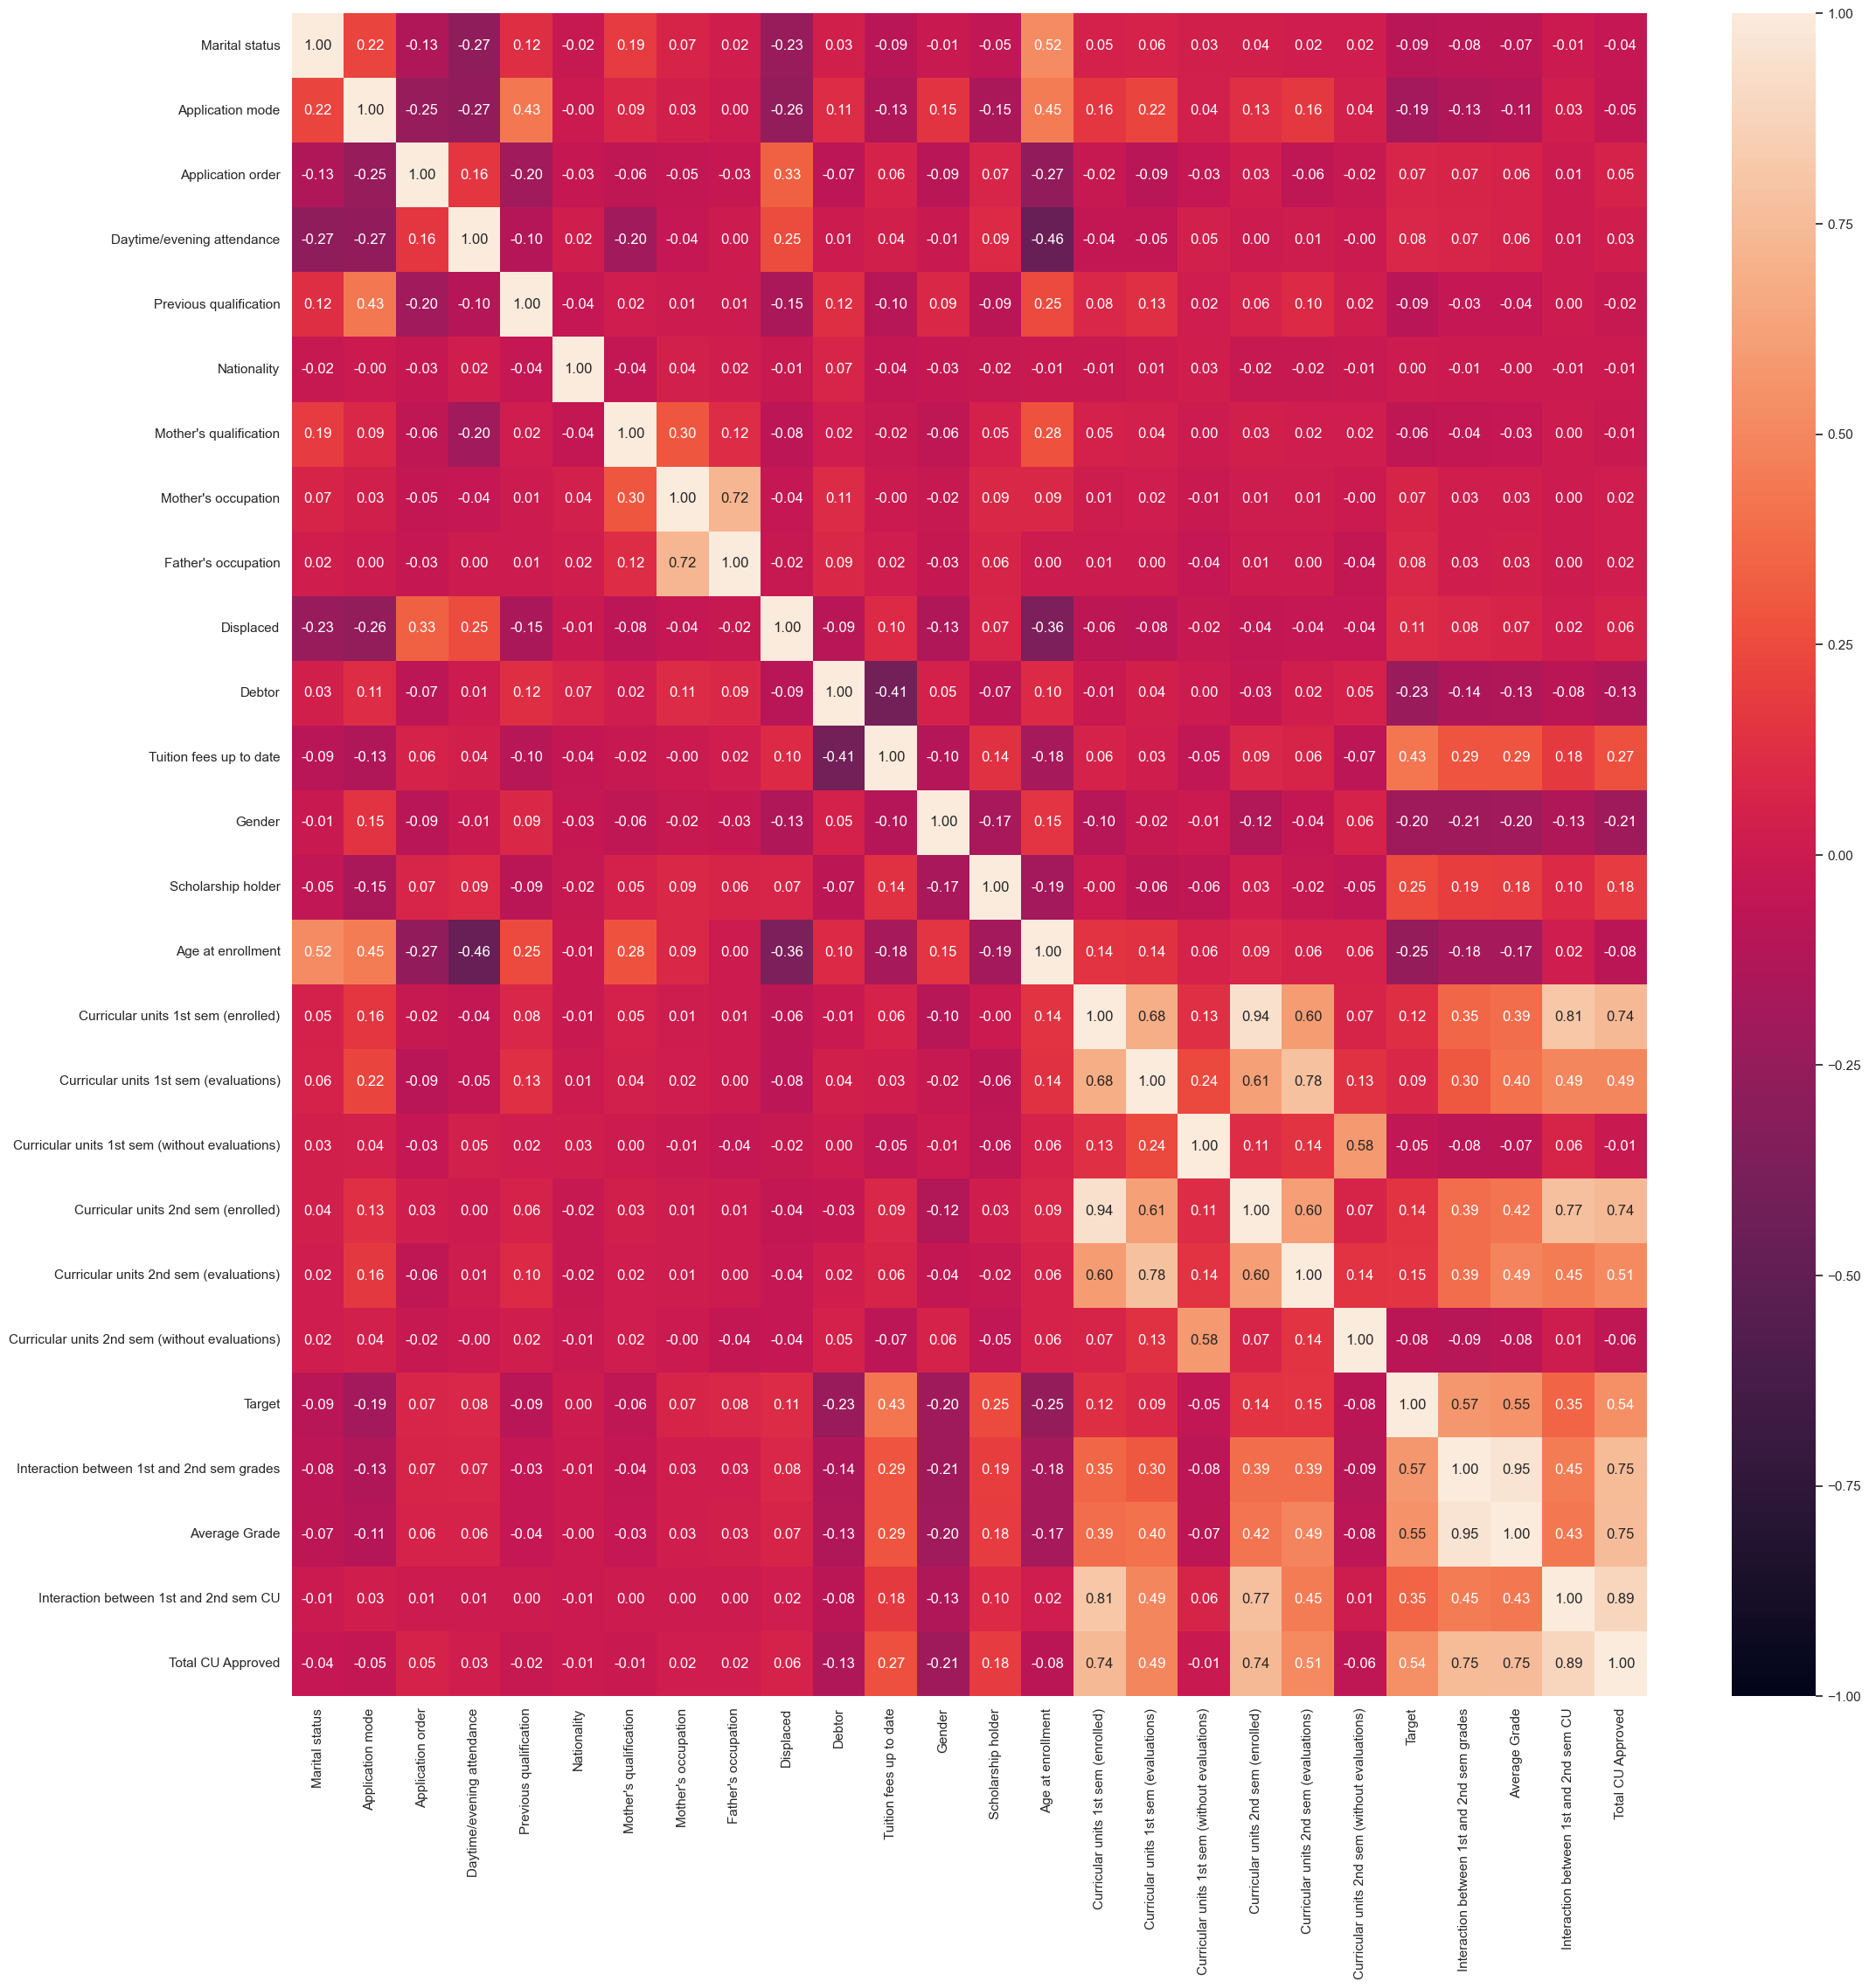

In [15]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(25, 25))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [16]:
def analyze_nationality(df):
   
    num_countries = df['Nationality'].nunique()
    
    most_common_country_count = df['Nationality'].value_counts().max()
    most_common_country = df['Nationality'].value_counts().idxmax()
    
    return num_countries, most_common_country, most_common_country_count

num_countries, most_common_country, most_common_country_count = analyze_nationality(data)

print("Number of different countries represented:", num_countries)
print("Number representing the most countries come from:", most_common_country)
print("Count of the most common country:", most_common_country_count)

Number of different countries represented: 21
Number representing the most countries come from: 1
Count of the most common country: 4314


### Identifying Key Predictors for Student Success
This section presents a statistical analysis aimed at pinpointing the top 10 features that are most strongly correlated with Student Status. By calculating the correlation of all features with Student Status and selecting the ten with the highest absolute values, we derive a clear ranking. The resulting bar chart visualizes these relationships, providing a straightforward depiction of which factors are most influential in determining Student Status, ranging from academic performance metrics like Curricular Units' grades and approvals to financial factors such as Tuition Fees and Scholarship holdings.

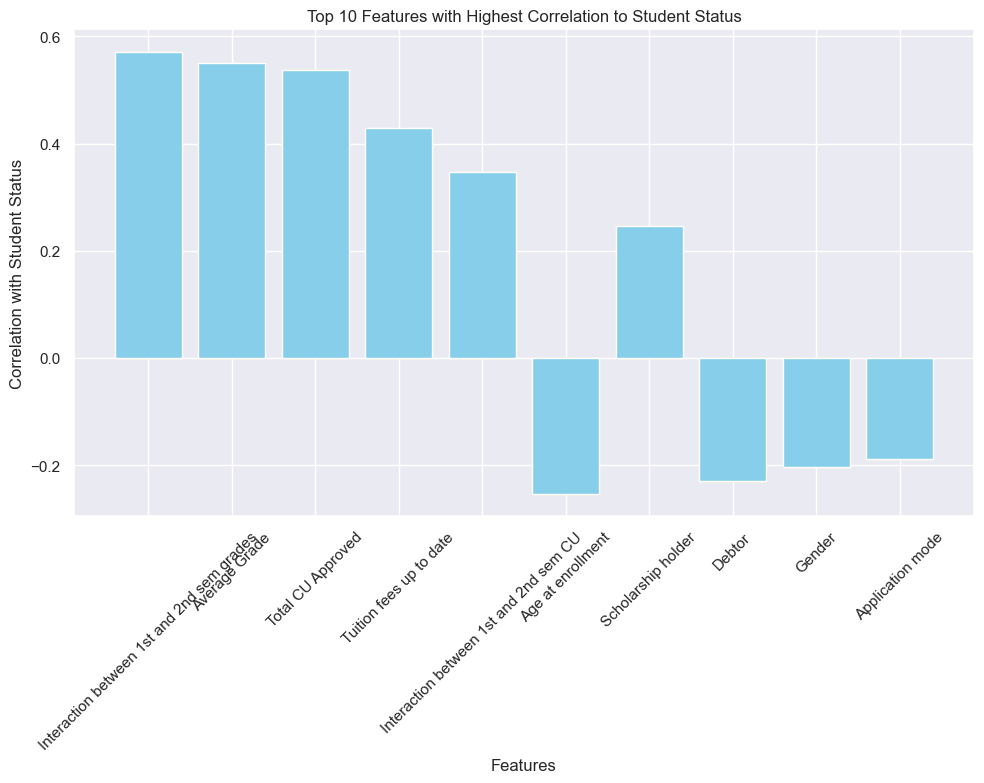

In [17]:
correlations = data.corr()['Target'].drop('Target')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Academic Performance and Its Impact on Student Status
After exploring a range of factors affecting student status, this section visually dissect the effects of curricular unit completion and grades on the academic statuses of students, now considering the newly engineered features that reflect their combined effects.
### Impact of Interaction Between 1st and 2nd Semester Grades on Student Status
The first bar chart exhibits a clear upward trend in the interaction of grades from the first and second semesters from dropouts to graduates, suggesting that not just individual semester performance but the combined performance over semesters is a strong indicator of eventual graduation.

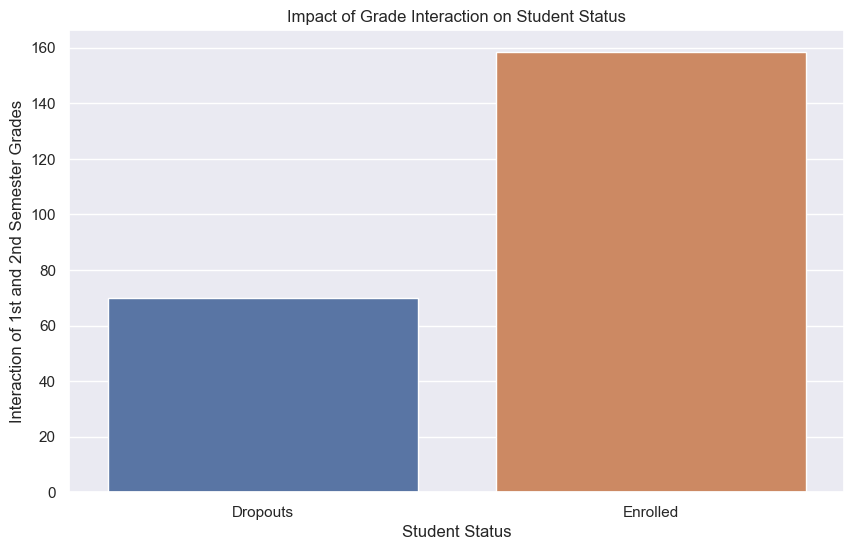

In [18]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Target', y='Interaction between 1st and 2nd sem grades', data=data, errorbar=None)
plt.xticks([0, 1], ['Dropouts', 'Enrolled'])
plt.xlabel('Student Status')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

### Impact of Total Approved Curricular Units on Student Status
The second chart shows the effect of the aggregated measure of curricular units approved in both semesters. Similar to the interaction feature, this aggregated measure is predictive of a student's ability to graduate.

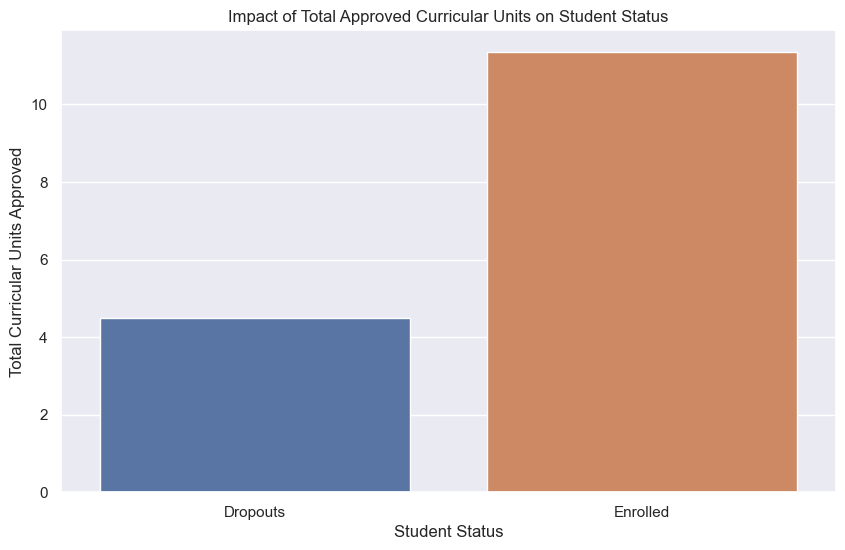

In [19]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Target', y='Total CU Approved', data=data, errorbar=None)
plt.xticks([0, 1], ['Dropouts', 'Enrolled'])
plt.xlabel('Student Status')
plt.ylabel('Total Curricular Units Approved')
plt.title('Impact of Total Approved Curricular Units on Student Status')
plt.show()

The consistent upward trends observed in these visual analyses support the importance of both cumulative achievements, such as the total number of approved curricular units, and the synergy between semesters' grades in the academic trajectory of students.

## Assessing the Role of Financial Status in Educational Progress
This section delves into the specific role of financial conditions on educational achievement. Through the analysis of debt, scholarship provision, and tuition fee payment status, we aim to understand the fiscal influences that may affect a student's academic journey.
### Debt and Educational Trajectories
The first stacked bar chart presents a striking visual contrast between students with and without debt across three educational status categories: enrollment, graduation, and dropout. The proportion of students who drop out is noticeably larger within the indebted group, suggesting a detrimental effect of financial obligations on educational continuity.

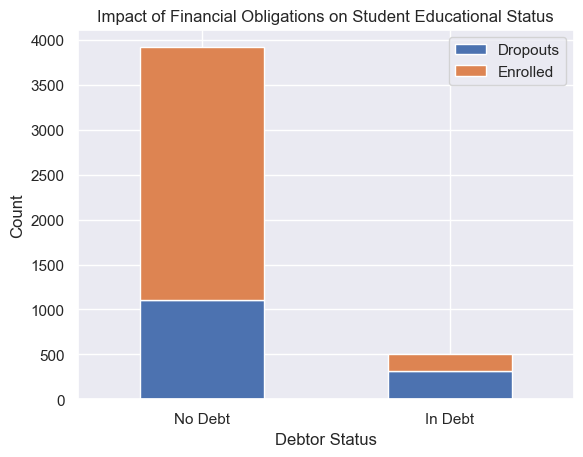

In [20]:
student_status_labels = {0: 'Dropouts', 1: 'Enrolled'}


debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}


grouped = data.groupby(['Debtor', 'Target']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

### Scholarships as a Support System
Next, the impact of scholarships is examined through another stacked bar chart. The distribution clearly shows a majority of scholarship recipients graduating, which could indicate that financial support is a significant factor in helping students complete their education.

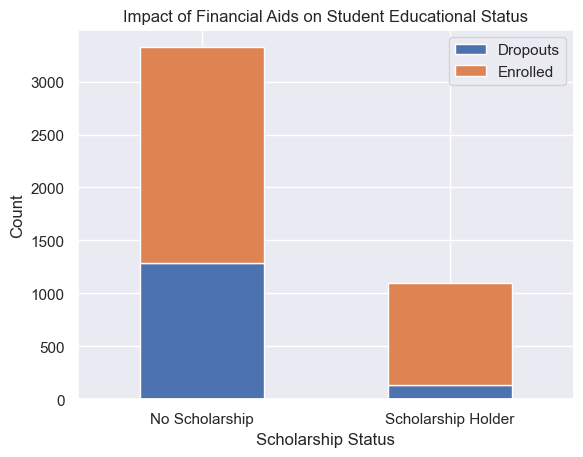

In [21]:
scholarship_status_labels = {0: 'No Scholarship', 1: 'Scholarship Holder'}


grouped = data.groupby(['Scholarship holder', 'Target']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

### Tuition Fees: A Predictive Financial Indicator
The final analysis focuses on the correlation between the status of tuition fee payments and student outcomes. The graph suggests that students with outstanding tuition fees have a higher likelihood of dropping out, making this factor a potent predictor of educational discontinuation.

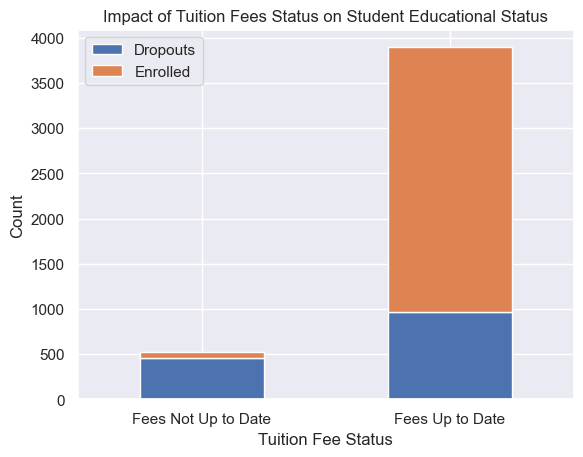

In [22]:
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

grouped = data.groupby(['Tuition fees up to date', 'Target']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

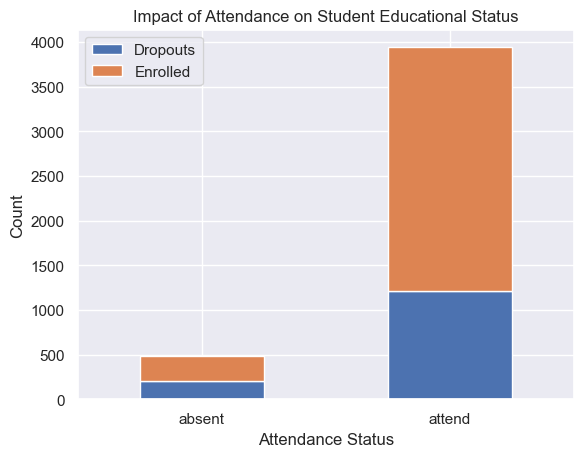

In [23]:
attendance_status_labels = {0: 'absent', 1: 'attend'}


grouped = data.groupby(['Daytime/evening attendance', 'Target']).size().unstack()
grouped.rename(index=attendance_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Attendance Status')
plt.ylabel('Count')
plt.title('Impact of Attendance on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

In these analyses, it is evident that financial status not only affects the present educational standing but also has long-term implications on a student's educational trajectory. Addressing these financial challenges could be crucial in supporting student retention and success.

## The Interplay of Age and Gender in Academic Progression
This section investigates the impact of demographic factors, specifically age and gender, on student academic status. By analyzing the age distribution at enrollment and the relationship between age and student status, along with the gender dynamics, we aim to uncover patterns that could be influential in educational attainment and retention.

### Age Distribution Analysis
The histogram depicts the age distribution at the time of enrollment among the student population. With most students enrolling between the ages of approximately 18 to 22, a skewed distribution is evident, highlighting a typical college-age demographic. This trend diminishes significantly with increasing age, suggesting a traditional focus on younger students within the academic system.

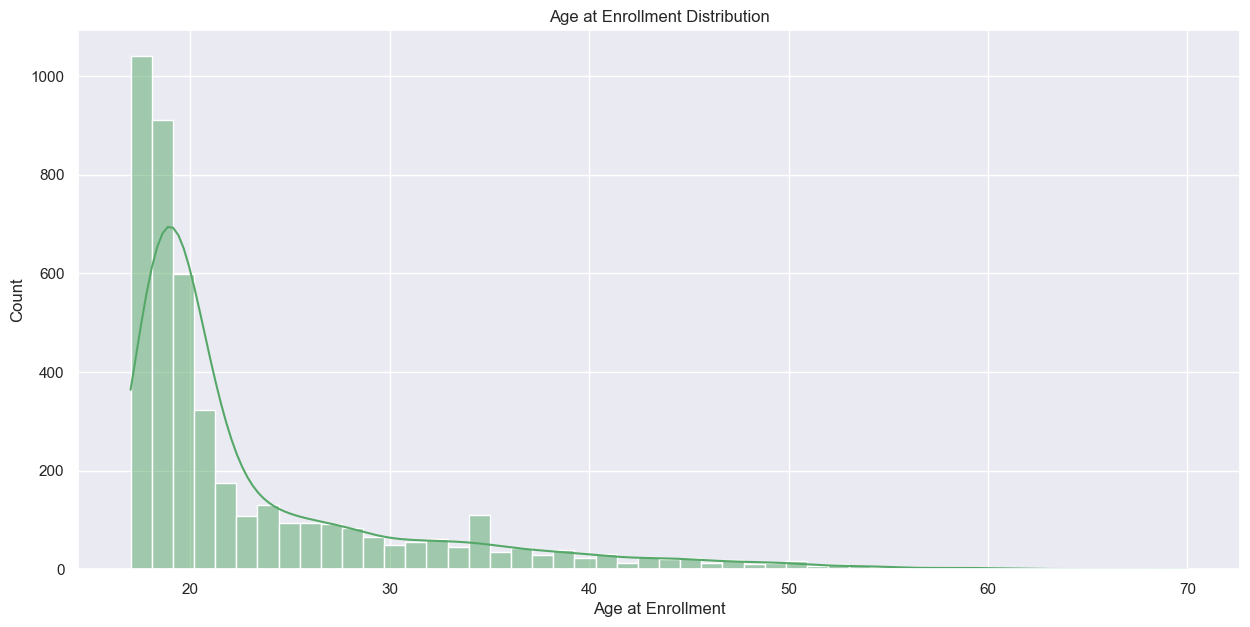

In [24]:
data['Age at enrollment'] = data['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 7))
ax = sb.histplot(data['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

### Dynamics of Age in Student Outcomes
The box plot showcases the age distribution in relation to student status, categorizing students into graduates, dropouts, and currently enrolled. Graduates tend to be younger, with a narrower age range suggesting a more uniform path to completion. In contrast, dropouts have a wider age range, indicating that dropping out affects a broader demographic. Current students have ages closely aligned with graduates, implying consistent enrollment ages.

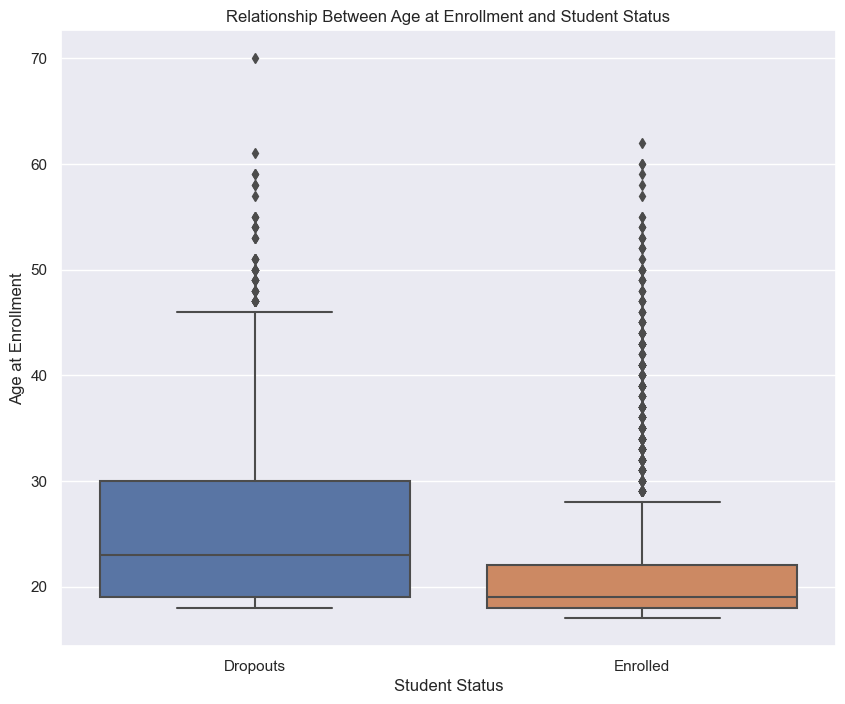

In [25]:
plt.figure(figsize=(10, 8))
sb.boxplot(x='Target', y='Age at enrollment', data=data)
plt.xticks([0, 1], ['Dropouts', 'Enrolled'])
plt.xlabel('Student Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Student Status')
plt.show()

In [26]:
# Extract Response and Predictors
predictors = ['Interaction between 1st and 2nd sem grades','Average Grade', 'Total CU Approved', 'Tuition fees up to date',
              'Interaction between 1st and 2nd sem CU']

y = pd.DataFrame(data['Target'])
X = pd.DataFrame(data[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
print()

Train Set : (3318, 5) (3318, 1)
Test Set  : (1106, 5) (1106, 1)



Accuracy: 0.8508137432188065


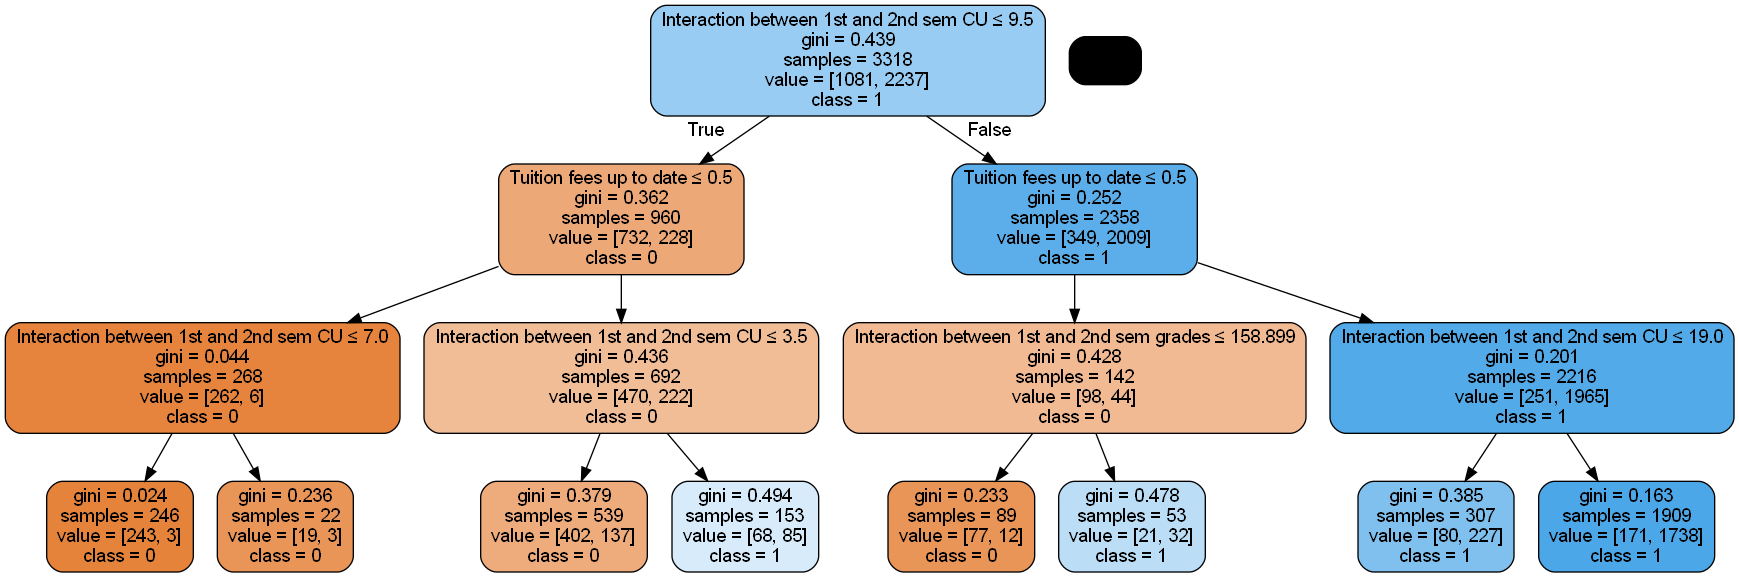

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Display
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictors,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('target.png')
Image(graph.create_png())

Random Forest

In [28]:
#Random Forest Model
# Split the data into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8833634719710669


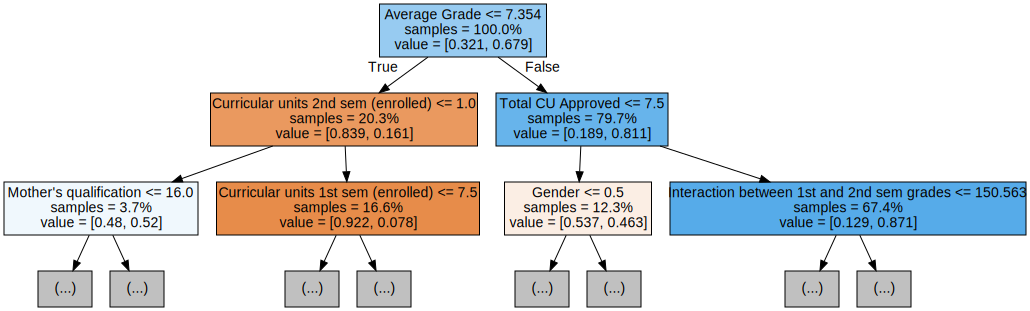

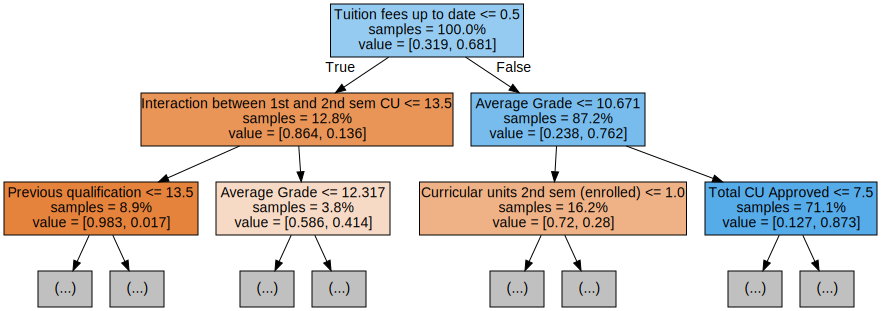

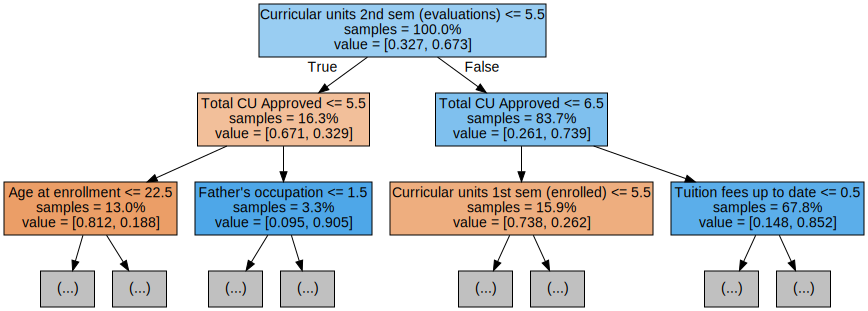

In [29]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002216A981410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002216A980E50>})

In [31]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 419}


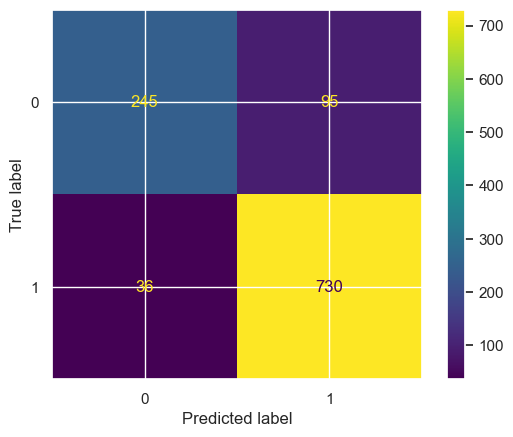

In [32]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8815551537070524
Precision: [0.87188612 0.88484848]
Recall: [0.72058824 0.95300261]


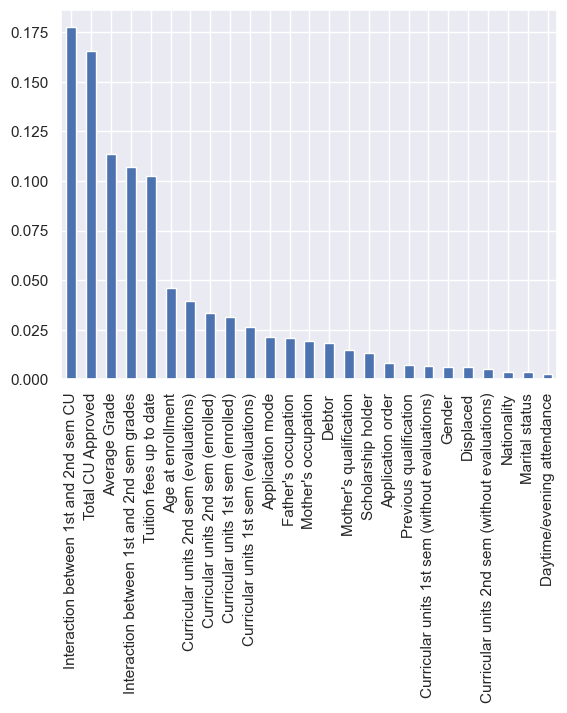

In [34]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Logistic Regression

In [35]:
#split dataset in features and target variable
feature_cols = ['Interaction between 1st and 2nd sem grades','Average Grade', 'Total CU Approved', 'Tuition fees up to date',
              'Interaction between 1st and 2nd sem CU']
X = data[feature_cols] # Features
y = data.Target # Target variable

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[236, 104],
       [ 63, 703]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted')

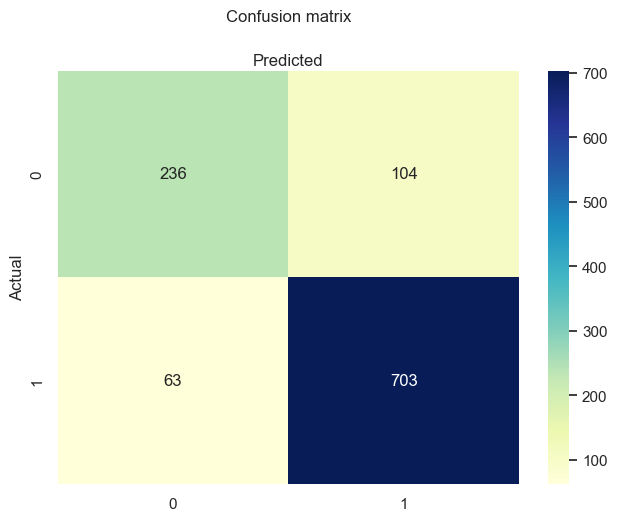

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [37]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.69      0.74       340
   with diabetes       0.87      0.92      0.89       766

        accuracy                           0.85      1106
       macro avg       0.83      0.81      0.82      1106
    weighted avg       0.85      0.85      0.85      1106



K-Nearest Neighbour (KNN)

In [38]:
# Split the data into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8462929475587704


Using Cross Validation to Get the Best Value of k

In [40]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

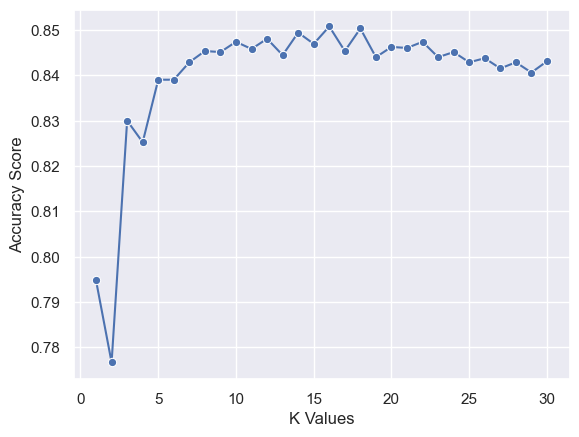

In [41]:
sb.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

We can see that a K value of 16 seems to be the best for the K-Nearest Neighbour model.

In [42]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [43]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8508137432188065
Precision: [0.86919831 0.84579977]
Recall: [0.60588235 0.95953003]


Naive Bayes Classification

In [44]:
# Split the data into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
# Prediction
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8300180831826401

In [47]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       340
           1       0.88      0.88      0.88       766

    accuracy                           0.83      1106
   macro avg       0.80      0.80      0.80      1106
weighted avg       0.83      0.83      0.83      1106



In [48]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred, average=None)}")

F1 Score : [0.72352941 0.8772846 ]


<Axes: >

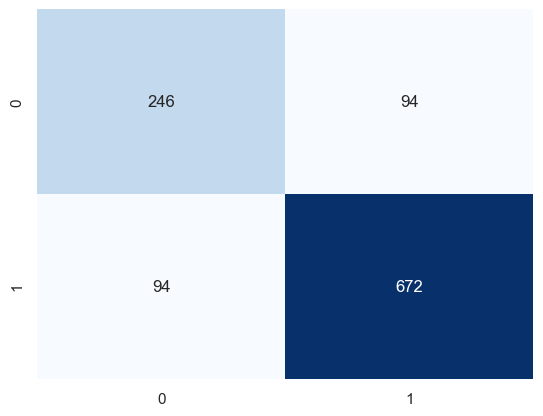

In [49]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)